In [2]:
# %pip install torch
# %pip install transformers
# %pip install matplotlib

In [3]:
from transformers import GPT2LMHeadModel 
from matplotlib import pyplot as plt

In [4]:
model_hf = GPT2LMHeadModel.from_pretrained('gpt2')
sd_hf = model_hf.state_dict()

for k, v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

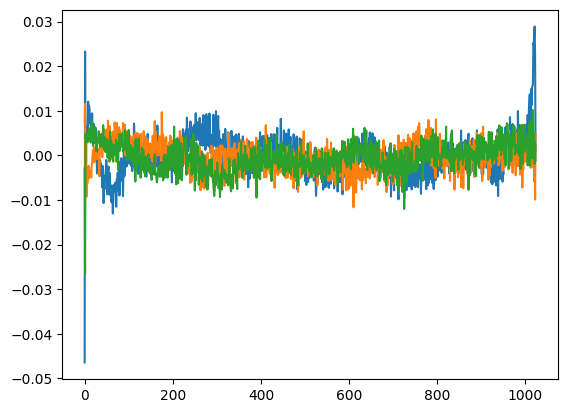

In [5]:
# can see sinusoidal structure in the weights even
# though the weights were initialized randomly
plt.plot(sd_hf["transformer.wpe.weight"][:, 150])
plt.plot(sd_hf["transformer.wpe.weight"][:, 700])
plt.plot(sd_hf["transformer.wpe.weight"][:, 210])

In [7]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Dost thou enjoy the gentle", max_length=50, truncation=True, num_return_sequences=5)

/Users/vkhanna/ai_work/mynanogpt/myenv/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Dost thou enjoy the gentle grace of our Lord? For behold, there are many things which the saints have done for our Lord Jesus Christ; and it is the same with our whole Lord: for they have given it up in spirit unto them that'},
 {'generated_text': 'Dost thou enjoy the gentle and mild, and not be satisfied by such a body as thy heart does not desire, lest thou shouldst find pleasure in the good ones of God, and to thy God by the good ones of my God, I'},
 {'generated_text': 'Dost thou enjoy the gentle taste of the sweet, savoury milk of this delicious butter? But why did we not taste it when it is made up of milk? If milk was good, why should it be in order to make it agreeable'},
 {'generated_text': 'Dost thou enjoy the gentle beauty of the mountains? Have you seen what the valley is filled with? If so, it seems to me it is inhabited by a variety of beasts and reptiles. From time to time I come upon one or two that'},
 {'generated_text': 'Dost thou enjoy the gentle

In [8]:
# wget the tiny shakespeare dataset for training
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2024-08-13 00:13:55--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8001::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.07s   

2024-08-13 00:13:56 (14.4 MB/s) - ‘input.txt’ saved [1115394/1115394]

